# Setembro Amarelo: análise do suicídio no Brasil com Data Science

Todos os anos, mais de 12 mil pessoas tiram suas próprias vidas no Brasil. Em um cenário mundial, esse número ultrapassa 1 milhão de pessoas, levando o suicídio a ser considerado um problema de saúde pública.

Para você ter noção da dimensão desses números, saiba que [o suicídio tem uma taxa maior do que vítimas de AIDS e da maioria dos tipos de câncer](https://pt.wikipedia.org/wiki/Setembro_Amarelo). Segundo a Organização Mundial da Saúde (OMS), o Brasil ocupa o oitavo lugar no número de suicídios no mundo: São 32 brasileiros por dia.

<center><img src="https://raw.githubusercontent.com/carlosfab/data_science/master/img/setembro_amarelo.png"></center>

**Setembro Amarelo** é uma iniciativa da Associação Brasileira de Psiquiatria (ABP), em parceria com o Conselho Federal de Medicina (CFM), para divulgar e alertar a população sobre o problema.

Oficialmente, o Dia Mundial de Prevenção ao Suicídio ocorre no dia 10 de setembro, porém durante o mês inteiro são promovidos debates, campanhas e ações para a conscientização sobre o suicídio.

O que trago neste artigo é muito mais que apenas um artigo de Ciência de Dados. É uma pequena contribuição que visa ajudar a entender a extensão desse problema no Brasil, além de incentivar o Setembro Amarelo dentro da comunidade Python e Data Science.

## Descrição dos dados sobre suicídio

O melhor conjunto de dados que eu encontrei na internet [está hospedado nesta página](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), e traz informações sobre vários países. O *dataset* contempla o período entre os anos de 1985 e 2016.

Esse *dataset*, na verdade, é um compilado de outros 4 *datasets*. A pessoa que disponibilizou o mesmo fez um grande trabalho de limpeza e padronização. Caso você deseje tenha interesse em conhecer as fontes que deram origem a este único arquivo, são elas:

* [United Nations Development Program. (2018). Human development index - HDI.](http://hdr.undp.org/en/indicators/137506)
* [World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016.](http://databank.worldbank.org/data/source/world-development-indicators#)
* [Suicide in the Twenty-First Century (Szamil, 2017).](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook)
* [World Health Organization. (2018). Suicide prevention.](http://www.who.int/mental_health/suicide-prevention/en/)

In [23]:
# importar pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
# importar os dados sobre suicídio para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")

### Dicionário de Variáveis

Esse arquivo *csv* possui 12 colunas. São elas:

* **country:** país onde os dados foram registrados
  * 101 países
* **year:** ano em que os dados foram registrados
  * 1987 a 2016
* **sex:** sexo considerado no registro
  * *male* - masculino
  * *female* - feminino
* **age**: faixa etária considerada
  * 5-14 anos
  * 15-24 anos
  * 25-34 anos
  * 35-54 anos
  * 55-74 anos
  * 75+ anos
* **suicides_no:** número de suicídios
* **population:** população para o grupo
* **suicides/100k pop:** número de suicídios por 100 mil habitantes
* **country_year:** identificador contendo `country` + `year`
* **HDI for year:** Índice de Desenvolvimento Humano (IDH) para o ano
* **gdp_for_year:** Produto Interno Bruto (PIB) para o ano
* **gdp_per_capita:** Produto Interno Bruto (PIB) per capita

## Análise Exploratória dos Dados

Como mencionei acima, este arquivo recebeu um tratamento anterior que facilitará muito a nossa análise.

O conjunto de dados contém 27.820 linhas e 12 colunas. Como você pode ver abaixo, os dados podem ser agrupados por vários critérios como país, ano, sexo e idade.

In [25]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# ver as 5 primeiras entradas dos dataset
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


A primeira coisa que eu quero fazer é criar um *DataFrame* contendo apenas as informações relacionadas ao Brasil.

Isso irá facilitar muito nossa manipulação da estrutura, além de ser uma boa prática em projetos de *Data Science*.


In [26]:
# extrair apenas os dados relativos ao Brasil
df_brasil = df[df.country == "Brazil"].copy()

# ver o formato do novo DataFrame
print("Formato do DataFrame: ", df_brasil.shape)

# exibir as 5 primeiras entradas do novo DataFrame
df_brasil.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Para ter uma noção da integridade dos dados, vou verificar isoladamente os *DataFrames* do Brasil e o Mundial. Principalmente quando se quer comparar duas coisas, é importante que eles sejam similares e estatisticamente representativas.

Como você vê abaixo, a porcentagem de valores ausentes referentes ao IDH torna inviável o uso dessa variável. Caso se desejasse realmente usar, seria necessária uma etapa de coleta de dados a partir de outras fontes.

In [27]:
# valores ausentes nos dados mundiais
print("--> Mundial:")
display(df.isnull().sum())

print("\n", "--." * 10, "\n")

# velores ausentes nos dados do Brasil
print("--> Brasil:")
display(df_brasil.isnull().sum())

--> Mundial:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 

--> Brasil:


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

### Tendência da taxa de suicídio no Brasil



Uma primeira comparação que farei diz respeito ao número de suicídios cometidos no Brasil por 100 mil habitantes, e a tendência do gráfico em relação à taxa mundial.

Para ver a tendência, é melhor sempre usar essa relação por 100 mil, pois a população do país cresceu muito de 1985 para 2015. Se formos comparar em termos absolutos, poderemos tirar conclusões erradas ou distorcidas.

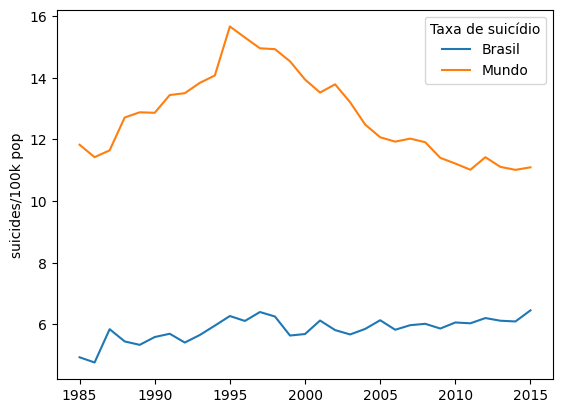

In [28]:
# pegar a media mundial e do Brasil em suicidios
years = df_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# como o Brasil nao tem 2016, vou eliminar do dataframe mundial essa entrada
suicides_world_mean.drop(2016, inplace=True)

# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

Uma coisa que é facilmente percebida no gráfico acima é que apesar da taxa de suicídios no Brasil ser menor que a média mundial, ela vem crescendo constantemente ao longo de 30 anos.

A linha laranja teve um pico por volta de 1995, porém reverteu o *slope* e vem caindo ano após ano. Já a linha azul (Brasil) tem um *slope* positivo praticamente ao longo de todo o período analisado.

### Faixa etária com maior índice de suícidio

Abaixo, eu criei uma tabela dinâmica (*pivot table*) para analisar as 6 faixas etárias em função do ano e do número de suicídios por 100 mil habitantes. 

Meu principal objetivo aqui é identificar qual a faixa etária que tem a maior representatividade entre aqueles que tiram a própria vida, e identificar se houve alguma mudança no perfil ao longo de 30 anos.

In [30]:
# criar uma tabela dinâmica
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

# reordenar as tableas para deixar em ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

# ver as 5 primeiras entradas da pivot table
table.head(20)

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5
1990,33.0,517.5,597.5,760.5,398.5,94.5
1991,38.0,537.0,634.0,832.5,441.0,95.5
1992,37.5,549.5,621.5,899.5,404.5,91.0
1993,41.0,625.5,722.0,860.0,405.0,100.5


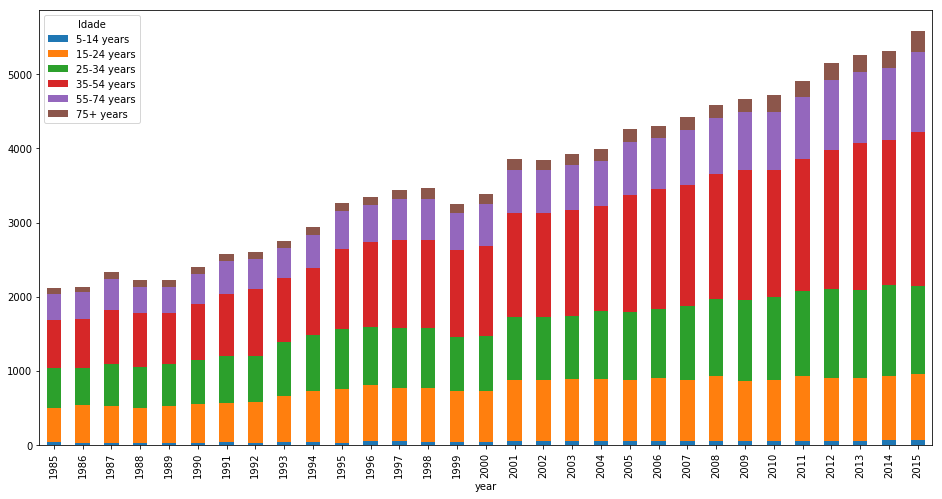

In [8]:
# plotar a pivot table das faixas etárias
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

Mesmo visualmente é fácil identificar que o grupo de pessoas que mais cometem suicídio está entre 35-54 anos. Em segundo lugar, estão pessoas entre 25-34 anos de idade.

Juntos, esses dois grupos correspondem a quase 60% dos registros do banco de dados.

In [9]:
# estatística de suicídios por faixa etária
table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

Um outro ponto que vale a pena ressaltar é o aumento de casos entre pessoas acima de 55 anos. Em 1985, as pessoas com mais idade representavam uma pequena fatia do número total.

Entretanto, em 2015 é nítido que mesmo para pessoas acima de 75 anos houve um incremento significativo no número de suicídios.

Para se inferir a causa dessa mudança de padrão, é necessário se avaliar mais profundamente questões que vão além dos números (como exemplo, fatores qualitativos, momento econômico do país e a cultura dominante de cada época).

### Taxa de suicídio entre homens e mulheres


Uma outra análise de grande importância é ver a porcentagem dos suicídios entre homens e mulheres.

Analisando-se todo o período, o *dataset* utilizado mostrou que aproximadamente 78% dos casos foram cometidos por homens e 22% deles por mulheres. Optou-se por pegar a média dos 30 anos, pois não houve mudança significativa desse comportamento durante o período.

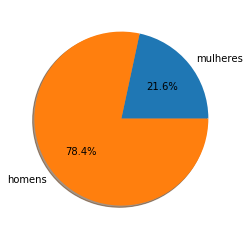

In [10]:
# extrair valores entre homens e mulheres
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

# plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

### Correlações entre o PIB, IDH e número de suicídios

Criando uma matriz de correlação e plotando um *heatmap*, infere-se que o aumento no PIB per capita não diminuiu o número de suicídios por 100 mil habitantes. Na verdade, ele se manteve estável, contrariando o senso comum da maioria das pessoas.

Em relação ao IDH, como foi mencionado anteriormente, há muitos valores ausentes nas células, o que pode dar uma interpretação incorreta ou com viés.


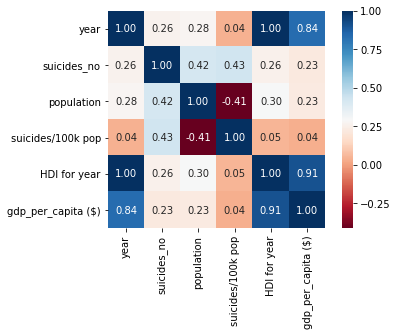

In [11]:
# plotar heatmap
corr = df_brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Data Science na prevenção do suicídio

O que eu quis trazer neste artigo foi um projeto de análise de dados visando conscientizar a comunidade Python e *Data Science* sobre a real importância de um problema tão latente nos dias atuais - porém negligenciado ou ignorado por boa parte das pessoas.

O conjunto de dados usado aqui é simplificado, porém ideal para uma abordagem inicial, para se criar uma consciência situacional a respeito do tema.

Há diversas iniciativas dentro do campo da Inteligência Artificial visando não apenas a conscientização, mas também prevenção de suicídios. [Uma das mais populares diz respeito à análise de postagens em redes sociais](https://qz.com/1367197/machines-know-when-someones-about-to-attempt-suicide-how-should-we-use-that-information/), onde algoritmos de *Machine Learning* são capazes de identificar potenciais suicidas e alertar outras pessoas.

> **A campanha é em setembro, mas falar sobre prevenção do suicídio em todos os meses do ano é fundamental** *-Setembro Amarelo*

Ainda são iniciativas muito incipientes, que esbarram em muitas questões de privacidade, porém empresas como o Facebook já tem apostado nesse caminho.

Espero que este artigo tenha trazido um pouco de conhecimento e alertado você sobre um problema tão sério. Sinta-se a vontade para expandir meu *notebook* e compartilhar o resultado com mais pessoas.

Lembre-se que não é frescura e que ninguém está querendo aparecer. Na verdade, a gente nunca tem a mínima ideia do que a outra pessoa está passando. Qualquer atitude que você tenha que possa contribuir para a prevenção do suicídio, pode significar uma vida a mais ;)